In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import os

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Data-Analysis-with-Python-GFG/main/27.%20GDP%20Analysis%20-%20Assignment/gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [3]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [4]:
df['Country Name'].nunique()

256

In [5]:
c=0
for i in df['Country Name']:
    if i=='India':
        c+=1
print(c)

57


In [6]:
df_pr=df[df['Country Name']=='World' ]
df_pr=df_pr[df_pr['Year']==1969]
df_pr['Value']

2258    2.690798e+12
Name: Value, dtype: float64

<Axes: xlabel='Year'>

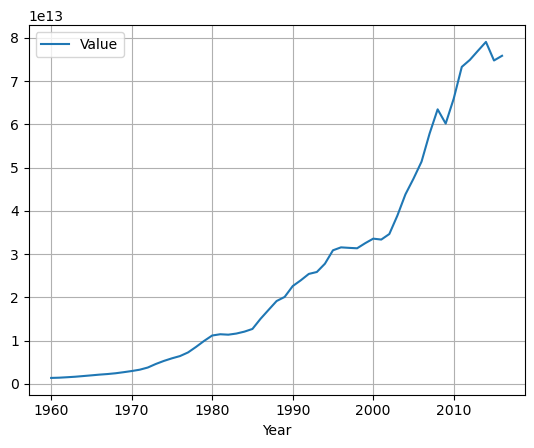

In [7]:
df_pr=df[df['Country Name']=='World' ]
df_pr.plot(x='Year',y='Value',grid=True)

In [8]:
df_pr=df[df['Country Name']=='India' ]
GDP_PREV=df_pr[df_pr['Year']==2015].iloc[0,3]
GDP_CURR=df_pr[df_pr['Year']==2016].iloc[0,3]
GDP_GROWTH=round((GDP_CURR-GDP_PREV)*100/GDP_PREV,2)
print(GDP_GROWTH)

8.32


In [9]:
df_pr[df_pr['Year']==1993].iloc[0,3]

275570363432.31

In [10]:
lst=list(df_pr['Year'].index)
gdp=[0]
for i in list(df_pr.iloc[:,2]):
    if(i==1960):
        continue
    GDP_PREV=df_pr[df_pr['Year']==i-1].iloc[0,3]
    GDP_CURR=df_pr[df_pr['Year']==i].iloc[0,3]
    GDP_GROWTH=round((GDP_CURR-GDP_PREV)*100/GDP_PREV,2)
    gdp.append(GDP_GROWTH)
print(gdp)

[0, 5.95, 7.47, 14.85, 16.64, 5.44, -22.99, 9.31, 5.89, 10.1, 6.8, 7.9, 6.11, 19.66, 16.38, -1.06, 4.31, 18.27, 13.02, 11.43, 21.79, 3.85, 3.73, 8.74, -2.8, 9.59, 7.09, 12.07, 6.29, -0.18, 8.42, -15.85, 6.7, -3.09, 17.18, 10.09, 9.05, 5.85, 1.32, 8.89, 2.09, 3.64, 6.08, 18.01, 16.69, 15.61, 13.77, 30.51, -1.18, 11.54, 25.13, 10.05, 0.25, 1.59, 9.62, 2.68, 8.32]


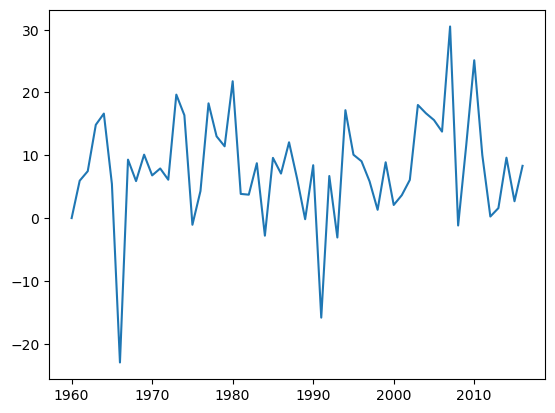

In [11]:
plt.plot(df_pr.iloc[:,2],gdp)

In [13]:
df_pr.iloc[1:,2:].head()

,Year,Value
6075,1961,3.870910e+10
6076,1962,4.159907e+10
6077,1963,4.777600e+10
6078,1964,5.572687e+10
6079,1965,5.876042e+10


In [14]:
df_pr.assign(GDP=gdp)
df_pr.head()

,Country Name,Country Code,Year,Value
6074,India,IND,1960,3.653593e+10
6075,India,IND,1961,3.870910e+10
6076,India,IND,1962,4.159907e+10
6077,India,IND,1963,4.777600e+10
6078,India,IND,1964,5.572687e+10


In [22]:
finallist=[]
finaldata=[]
for country in df['Country Name'].unique():
    df_pr=df[df['Country Name']==country]
    gdp=[0]
    data=df_pr.values
    for i in range(1,len(data)):
        gdp_change=round(((data[i][3]-data[i-1][3])/data[i-1][3])*100,2)
        gdp.append(gdp_change)
    finallist.extend(gdp)
    df_pr.assign(GDP=gdp)
    finaldata.append(df_pr)
df=df.assign(GDP_growth=finallist)
df.head()

,Country Name,Country Code,Year,Value,GDP_growth
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [16]:
df.groupby('Country Name')['GDP_growth'].mean().sort_values(ascending=False)

Country Name
Cayman Islands              108.380000
Equatorial Guinea            22.312453
Nauru                        20.650000
Iraq                         18.075854
Oman                         17.681154
                               ...    
Barbados                      3.109259
San Marino                    2.148333
American Samoa                1.937333
Northern Mariana Islands      0.338667
South Sudan                  -3.166250
Name: GDP_growth, Length: 256, dtype: float64

In [17]:
finaldata[0].head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [18]:
df[df['Country Name']=='Cayman Islands']

,Country Name,Country Code,Year,Value,GDP_growth
3863,Cayman Islands,CYM,1996,1.012444e+09,0.00
3864,Cayman Islands,CYM,2006,3.207033e+09,216.76


In [ ]:
df_pr=df[df['Country Name']=='World']
fig=px.line(df_pr,x='Year',y='Value',title="World GDP Analysis")
fig

In [ ]:
pyo.plot(fig,filename='World.html')

In [ ]:
df_pr=df[df['Country Name']=='India']
px.line(df_pr,x='Year',y='Value',title="India GDP Analysis",range_y=[0,80000000000000])

In [ ]:
!mkdir GDP_graphs

In [ ]:
for i in df['Country Name'].unique():
    df_pr=df[df['Country Name']==i]
    pyo.plot(px.line(df_pr,x='Year',y='Value',title=i+' GDP Analysis'),filename='GDP_graphs/'+i+'.html',auto_open=False)

In [ ]:
os.mkdir('GDP_graphs_individual')

In [ ]:

for i in df['Country Name'].unique():
    df_pr=df[df['Country Name']==i]
    pyo.plot(px.line(df_pr,x='Year',y='Value',title=i+' GDP Analysis',range_y=[0,80000000000000]),filename='GDP_graphs_individual/'+i+'.html',auto_open=False)

In [6]:
len(os.listdir('GDP_graphs'))

256

In [ ]:
fig=px.line(df,x='Year',y='Value',title='Countries',color='Country Name')
pyo.plot(fig,filename='Countries GDP.html')

In [ ]:
c1=df[df['Country Name']=='India']
c2=df[df['Country Name']=='World']
df_pr=pd.concat([c1,c2],axis=0)
fig=px.line(df_pr,x='Year',y='Value',title='Comparison b/w India and China',color='Country Name')
pyo.plot(fig,filename='IND and CHN.html')

In [20]:
lst=['IND','ITA', 'USA', 'CHN']
dfs=[]
def compare(lst,isOpen):
    for i in lst:
        dfs.append(df[df['Country Code']==i])
        df_pr=pd.concat(dfs,axis=0)
    fig=px.line(df_pr,x='Year',y='Value',title='Comparison '+'|'.join(lst),color='Country Name')
    pyo.plot(fig,filename='-'.join(lst)+'.html',auto_open=isOpen)
compare(['IND','WLD'],False)

In [23]:
df.head()

,Country Name,Country Code,Year,Value,GDP_growth
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [24]:
fig=px.line(df,x='Year',y='GDP_growth',title='GDP Growth ',color='Country Name')
pyo.plot(fig,filename='GDP growth for all countries.html')

'GDP growth for all countries.html'

In [29]:
dfs=[]
for country in df['Country Name'].unique():
    df_pr=df[df['Country Name']==country]
    if len(df_pr)==57:
        dfs.append(df_pr)
df_pr=pd.concat(dfs,axis=0)
fig=px.line(df,x='Year',y='GDP_growth',title='GDP Growth ',color='Country Name')
pyo.plot(fig,filename='GDP growth since 1960.html')

'GDP growth since 1960.html'

In [28]:
df_pr

,Country Name,Country Code,Year,Value,GDP_growth
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60
